# Deep Learning

In [1]:
%matplotlib inline
# import necessary libraries and specify that graphs should be plotted inline. 
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
np.random.seed(13)

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils

### MNIST Dataset

In [3]:
# visualization
def draw_digit(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data)
    plt.gray()


In [4]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

num_classes = 10 # class size
input_unit_size = 28*28 # input vector size

x_train = x_train.reshape(x_train.shape[0], input_unit_size)
x_test  = x_test.reshape(x_test.shape[0], input_unit_size)
x_train = x_train.astype('float32')
x_test  = x_test.astype('float32')
x_train /= 255
x_test  /= 255

# one-hot representation
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

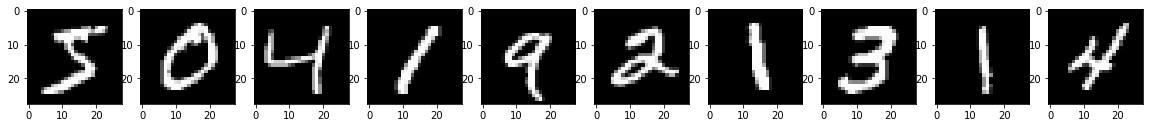

In [5]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw_digit(x_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

In [6]:
model = keras.Sequential()
model.add(layers.Dense(500, input_dim=input_unit_size, activation='relu'))
model.add(layers.Dense(500, activation='relu'))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               392500    
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dropout (Dropout)            (None, 500)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 648,010
Trainable params: 648,010
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

result = model.fit(x_train, y_train, epochs=50, batch_size=128, validation_split=0.1)

Epoch 1/50
422/422 [==============================] - 5s 10ms/step - loss: 2.2871 - accuracy: 0.1533 - val_loss: 2.2150 - val_accuracy: 0.2835
Epoch 2/50
422/422 [==============================] - 4s 10ms/step - loss: 2.1690 - accuracy: 0.2927 - val_loss: 2.0919 - val_accuracy: 0.4600
Epoch 3/50
422/422 [==============================] - 4s 9ms/step - loss: 2.0521 - accuracy: 0.4246 - val_loss: 1.9712 - val_accuracy: 0.5708
Epoch 4/50
422/422 [==============================] - 4s 10ms/step - loss: 1.9388 - accuracy: 0.5200 - val_loss: 1.8515 - val_accuracy: 0.6470
Epoch 5/50
422/422 [==============================] - 4s 10ms/step - loss: 1.8254 - accuracy: 0.5894 - val_loss: 1.7328 - val_accuracy: 0.6982
Epoch 6/50
422/422 [==============================] - 4s 10ms/step - loss: 1.7128 - accuracy: 0.6381 - val_loss: 1.6158 - val_accuracy: 0.7307
Epoch 7/50
422/422 [==============================] - 4s 10ms/step - loss: 1.6055 - accuracy: 0.6696 - val_loss: 1.5018 - val_accuracy: 0.7530


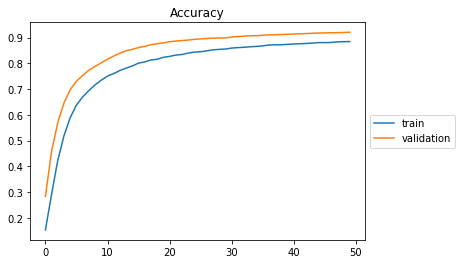

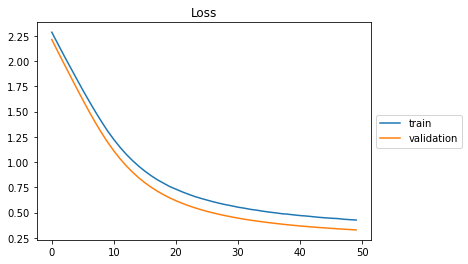

In [8]:
x = range(50)
plt.plot(x, result.history['accuracy'], label='train')
plt.plot(x, result.history['val_accuracy'], label='validation')
plt.title('Accuracy')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

plt.plot(x, result.history['loss'], label='train')
plt.plot(x, result.history['val_loss'], label='validation')
plt.title('Loss')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## CNN

In [9]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [10]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [11]:
batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
422/422 [==============================] - 19s 44ms/step - loss: 0.3673 - accuracy: 0.8927 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 2/15
422/422 [==============================] - 18s 44ms/step - loss: 0.1081 - accuracy: 0.9668 - val_loss: 0.0583 - val_accuracy: 0.9837
Epoch 3/15
422/422 [==============================] - 19s 44ms/step - loss: 0.0813 - accuracy: 0.9751 - val_loss: 0.0484 - val_accuracy: 0.9867
Epoch 4/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0688 - accuracy: 0.9786 - val_loss: 0.0406 - val_accuracy: 0.9893
Epoch 5/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0570 - accuracy: 0.9820 - val_loss: 0.0355 - val_accuracy: 0.9902
Epoch 6/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0538 - accuracy: 0.9834 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 7/15
422/422 [==============================] - 19s 45ms/step - loss: 0.0482 - accuracy: 0.9852 - val_loss: 0.0326 - val_accuracy:

In [12]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.023213088512420654
Test accuracy: 0.9926999807357788


### RNN

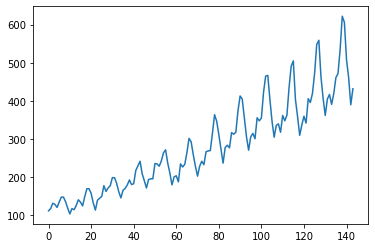

In [13]:
# source: https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

import pandas
import matplotlib.pyplot as plt
dataset = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
plt.plot(dataset)
plt.show()

In [14]:
import pandas
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [15]:
# fix random seed for reproducibility
np.random.seed(7)

In [16]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

# load the dataset
dataframe = pandas.read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


In [17]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


Epoch 1/100
94/94 - 1s - loss: 0.0480
Epoch 2/100
94/94 - 0s - loss: 0.0237
Epoch 3/100
94/94 - 0s - loss: 0.0167
Epoch 4/100
94/94 - 0s - loss: 0.0148
Epoch 5/100
94/94 - 0s - loss: 0.0138
Epoch 6/100
94/94 - 0s - loss: 0.0129
Epoch 7/100
94/94 - 0s - loss: 0.0119
Epoch 8/100
94/94 - 0s - loss: 0.0111
Epoch 9/100
94/94 - 0s - loss: 0.0101
Epoch 10/100
94/94 - 0s - loss: 0.0092
Epoch 11/100
94/94 - 0s - loss: 0.0082
Epoch 12/100
94/94 - 0s - loss: 0.0075
Epoch 13/100
94/94 - 0s - loss: 0.0065
Epoch 14/100
94/94 - 0s - loss: 0.0058
Epoch 15/100
94/94 - 0s - loss: 0.0051
Epoch 16/100
94/94 - 0s - loss: 0.0044
Epoch 17/100
94/94 - 0s - loss: 0.0039
Epoch 18/100
94/94 - 0s - loss: 0.0033
Epoch 19/100
94/94 - 0s - loss: 0.0032
Epoch 20/100
94/94 - 0s - loss: 0.0028
Epoch 21/100
94/94 - 0s - loss: 0.0025
Epoch 22/100
94/94 - 0s - loss: 0.0024
Epoch 23/100
94/94 - 0s - loss: 0.0022
Epoch 24/100
94/94 - 0s - loss: 0.0021
Epoch 25/100
94/94 - 0s - loss: 0.0021
Epoch 26/100
94/94 - 0s - loss: 0.

In [18]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 22.63 RMSE
Test Score: 52.50 RMSE


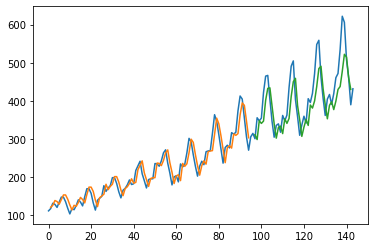

In [19]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()